<div align="Center"><h1>The Impact of Public Transit on Ridership:</h1></div>

<div align="Center"><h2>A Statistical Analysis</h2></div>

Setting up the environment:

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing data and creating dataframes:

In [215]:
trip=pd.read_csv('/Users/Darius/Google Drive/Dropbox/Jobs/Uber/UBEx/Input data/201408_trip_data.csv')
station=pd.read_csv('/Users/Darius/Google Drive/Dropbox/Jobs/Uber/UBEx/Input data/stations.csv')
bike=pd.merge(trip, station, on='Start Station', how='inner')

Visual analysis of total trips from each station by bar chart, with color indicating station type:
<table border="1">
<tr>
<td>Bart</td>
<td>Yellow</td>
</tr>
<tr>
<td>Caltrain</td>
<td>Red</td>
</tr>
<tr>
<td>Regular (Not next to public transit station)</td>
<td>Blue</td>
</tr>
</table>

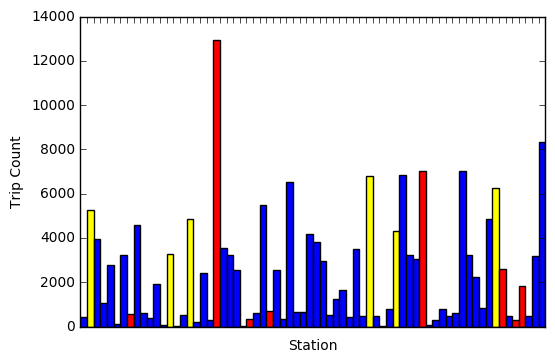

In [223]:
from collections import Counter
s1=Counter(bike['Start Station'])

startstation=list(s1.keys())
freq=list(s1.values())

mycolor=[]
stationtype=[]
thisstationtype=''
for i in range(0,len(startstation)):
    thisstationtype=list(station.loc[station['Start Station']==startstation[i]]['Public Transit'])[0]
    stationtype.append(thisstationtype)
    if thisstationtype=='Caltrain':
        mycolor.append('red')
    elif thisstationtype=='Bart':
        mycolor.append('yellow')
    else:
        mycolor.append('blue')

pos=np.arange(0,len(startstation)*2, step=2)
wid=2.0

plt.bar(pos, freq, wid, color=mycolor)
plt.xticks(pos, '' )
plt.xlabel('Station')
plt.ylabel('Trip Count')
plt.show()

From the above chart, we can see that public transit stations stand out. Let's separate the data and examine them as 2 individual sets.

In [217]:
ptstation=[]
regstation=[]

for i in range(0,len(startstation)):
    if stationtype[i]=='Bart' or stationtype[i]=='Caltrain':
        ptstation.append(freq[i])
    else:
        regstation.append(freq[i])

Now that we have the data in separate sets, let's take a closer look at summary statistics and histograms.
First, public transit stations:

Mean: 4068.57142857
Median: 3780.5
Standard deviation: 3398.19554458


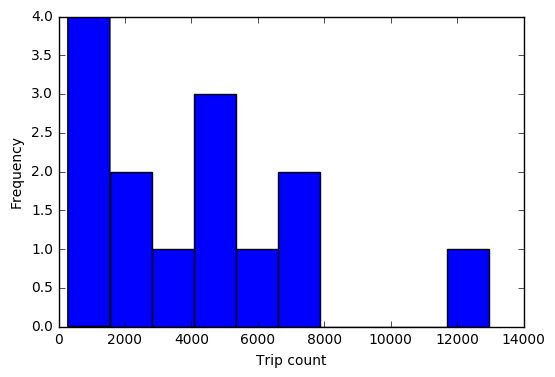

In [219]:
print('Mean:',np.mean(ptstation))
print('Median:',np.median(ptstation))
print('Standard deviation:',np.std(ptstation))
plt.hist(ptstation)
plt.xlabel('Trip count')
plt.ylabel('Frequency')
plt.show()

Next, regular stations:

Mean: 2050.57142857
Median: 934.5
Standard deviation: 2055.79073992


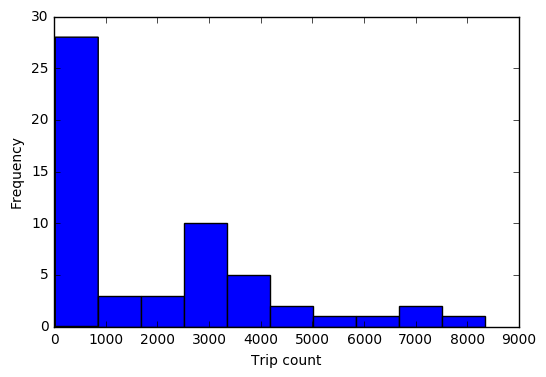

In [220]:
print('Mean:',np.mean(regstation))
print('Median:',np.median(regstation))
print('Standard deviation:',np.std(regstation))
plt.hist(regstation)
plt.xlabel('Trip count')
plt.ylabel('Frequency')
plt.show()

We can already see the public transit stations have a higher sample mean and median. However there is a bigger variance indicated by the bigger standard deviation.

To confirm the theory, let's perform a 2-sample t-test:

In [221]:
from scipy import stats
stats.ttest_ind(ptstation,regstation)

Ttest_indResult(statistic=2.7903445779826042, pvalue=0.0068263274118559184)

<b>Since p-value<.01, we reject the null hypothesis and conclude that the true mean of total trips at public transit stations is greater than the true mean of total trips at other stations. This confirms the theory that placing a bike share station next to a public transit station like Bart and Caltrain would significantly increase ridership. This should be employed as the strategy for station expansion.</b>